In [1]:
########## SECTION 1 - Importing Required Packages and Functions ###############################
import pandas as pd
import numpy as np 
import time
from simulate import generateData
from linear_programs import checkMleExistence

In [15]:
########## SECTION 2 - Generating Simulated Dataset ############################################

# number of observations
n=4000

# number of (Gaussian) covariates
p=20

# Gaussian covariate distribution parameters
# NOTE: MAY WANT TO GO BACK AND REDO SIMULATION CODE TO GENERATE DATA DIRECTLY FROM MULTIVARIATE NORMAL
mu = 0
stdev = 1.0/np.sqrt(n) #signal strength
# NOTE: Added a scaling factor to stdev

# Generate the data
# - X is an (n,p+1) dimensional array with the n rows corresponding to observations and the p+1 columns
#   corresponding to the covariates + a column of 1's (for the intercept term)
# - Beta is the (p+1,) dimensional array of 'True' regression coefficients
# - y is the (n,) dimensional array of response values for the observations
# - means is the (n,) dimensional array of predicted values (probabilities in case of logistic)
# *THOUGHT: Perhaps we could use another term instead of means to avoid confusion with the systematic component?
# * perhaps y_hat, preds, etc?
X, Beta, y, means = generateData(dist = 'bernoulli', n = n, p = p, mu = mu, stdev = stdev) 

In [16]:
# Combining the predictor and response data into a single pandas dataframe df
df = pd.DataFrame(X)
y = np.array(y)
y = np.where(y>0,1,-1)# Changed label 0 to -1
df['y'] = pd.Series(y)

In [17]:
np.arange(min(means),max(means),100)

array([0.45099755])

(array([  1.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   5.,   0.,   1.,
          5.,   5.,   7.,   7.,  10.,   6.,  10.,   6.,   8.,  13.,  16.,
         25.,  16.,  23.,  33.,  27.,  38.,  50.,  43.,  55.,  50.,  48.,
         68.,  79.,  79.,  78.,  83.,  94.,  95., 115., 104., 107.,  85.,
        131., 117., 128., 110., 132., 117., 116., 124., 107., 124., 125.,
        121.,  96.,  97.,  73.,  82.,  85.,  65.,  64.,  56.,  56.,  49.,
         36.,  41.,  41.,  34.,  19.,  29.,  22.,  21.,  16.,  10.,   6.,
          9.,   4.,  14.,   3.,   2.,   4.,   2.,   0.,   3.,   2.,   1.,
          4.,   3.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([0.45099755, 0.45191119, 0.45282483, 0.45373848, 0.45465212,
        0.45556576, 0.45647941, 0.45739305, 0.45830669, 0.45922034,
        0.46013398, 0.46104762, 0.46196127, 0.46287491, 0.46378855,
        0.4647022 , 0.46561584, 0.46652948, 0.46744312, 0.46835677,
        0.46927041, 0.47018405, 0.4710977 , 0.47201134, 0.47

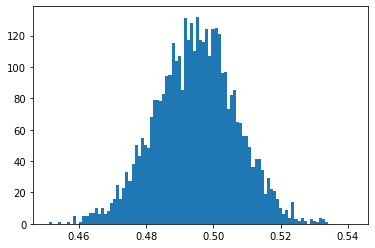

In [18]:
# QUICK ASIDE...
# Looking at distribution of means - we have many values that are trivially 0 or 1, need to fix this at
# the data generation stage...
import matplotlib.pyplot as plt
min_mean = min(means)
max_mean = max(means)
plt.hist(means, bins=np.arange(min_mean, max_mean, (max_mean-min_mean)/100))

# YAY! Adding Scaling factor to stdev improved histogram!

In [25]:
########## SECTION 3 -  ############################################
########## SECTION 2 - Generating Simulated Dataset ############################################

# Given a data sample (y_i, X_i), start by choosing a "fine grid" of kappas <= 1/2
kappaArray = np.arange(0.01,0.51,0.01)

# Initializing list to hold proportions of times MLE is found to exist at each kappa
kappaProportion = []

d1 = time.time()
# For each k_j in the grid, we do the following:
for kappa in kappaArray:
    
    # Set sample size to n_j =p / k_j (rounding off to nearest integer)
    sampleSize = int(round(p/kappa))

    # Here, we draw several samples and check to see if the MLE exists. B is the number of
    # rounds of sampling
    B = 5
    
    # nMleExist is the total number of times the MLE was found to exist during each round. This
    # is initially set to 0
    nMleDNE = 0
    for i in range(B):
        print(i)
        subSample = df.sample(n=sampleSize) # draw the sample
        subSample =subSample.reset_index()
        mleStatus = checkMleExistence(subSample) # check if MLE exists
        # Note that checkMleExistence returns a coded value. The list of coded values can be
        # found here: https://www.gurobi.com/documentation/9.0/refman/optimization_status_codes.html
        # We are most interested in whether the model was proved to be infeasible, in which case, the
        # value 3 is returned. In this case we know the MLE exists and is unique.
        if mleStatus == 2:
            nMleDNE +=1
            
    # Dividing nMleExist by B gives an estimate of the proportion of times the MLE exists.
    propMleDNE = nMleDNE/B
    kappaProportion.append(propMleDNE)
    
    # QUESTION: AREN'T WE INTERESTED IN THE NUMBER OF TIMES MLE DOES NOT EXIST?
    #### Fixed

# Now, we need (kappa_j-1, kappa_j) such that kappa_j is the smallest value for which the proportion of times
# the MLE ... 
uIdx = 0
for kappaProp in kappaProportion:
    if kappaProp>=0.5:
        uIdx = kappaProportion.index(kappaProp)
        break
if uIdx != 0:
    uKappa = kappaArray[uIdx]
    print(uKappa)
    lKappa = kappaArray[uIdx-1]
else:
    print('Method Failed, All Subsamples are separable!')

d2 = time.time()
delta = round(d2 - d1)
print(kappaProportion, delta)

0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
Method Failed, All Subsamples are separable!
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] 16
